# Convolutional Neural Network
## Image Classification

## 1. Import important libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 2. Import datasets from keras libraries

In [2]:
(x_train , y_train) , (x_test , y_test) = datasets.cifar10.load_data()
x_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [3]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
# Reshape 2-D array of datasets into 1-D array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

## 3. Data Visualization

In [6]:
def plot_sample(x , y , index):
    plt.figure(figsize= (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

classes = ["airplane","automobile","bird","cat",'deer',"dog","frog","horse","ship","truck" ]

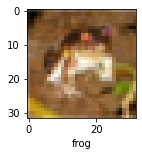

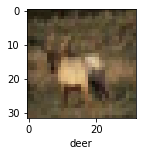

In [7]:
plot_sample( x_train , y_train ,0) ,
plot_sample( x_train , y_train ,3)

## 4. Scaling of datasets

In [8]:
x_train = x_train / 255
x_test = x_test / 255

## 5. Evaluate model on ANN

In [9]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

ann.fit(x_train , y_train , epochs=5)

Epoch 1/5
1563/1563 [==============================] - 194s 123ms/step - loss: 1.8480 - accuracy: 0.3420
Epoch 2/5
1563/1563 [==============================] - 188s 120ms/step - loss: 1.6716 - accuracy: 0.4120
Epoch 3/5
1563/1563 [==============================] - 162s 104ms/step - loss: 1.5928 - accuracy: 0.4410
Epoch 4/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5395 - accuracy: 0.4606
Epoch 5/5
1563/1563 [==============================] - 190s 121ms/step - loss: 1.4990 - accuracy: 0.4760


In [10]:
ann.evaluate(x_test , y_test)

313/313 [==============================] - 23s 69ms/step - loss: 1.7297 - accuracy: 0.3722


[1.7296831607818604, 0.37220001220703125]

In [11]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report \n", classification_report(y_test , y_pred_classes))

Classification Report 
               precision    recall  f1-score   support

           0       0.68      0.17      0.27      1000
           1       0.58      0.49      0.53      1000
           2       0.38      0.18      0.25      1000
           3       0.33      0.28      0.30      1000
           4       0.39      0.29      0.33      1000
           5       0.47      0.24      0.32      1000
           6       0.31      0.82      0.45      1000
           7       0.80      0.19      0.31      1000
           8       0.28      0.89      0.43      1000
           9       0.65      0.17      0.27      1000

    accuracy                           0.37     10000
   macro avg       0.49      0.37      0.35     10000
weighted avg       0.49      0.37      0.35     10000



** it shows ANN performs very bad **

# 6. Evaluate CNN Model

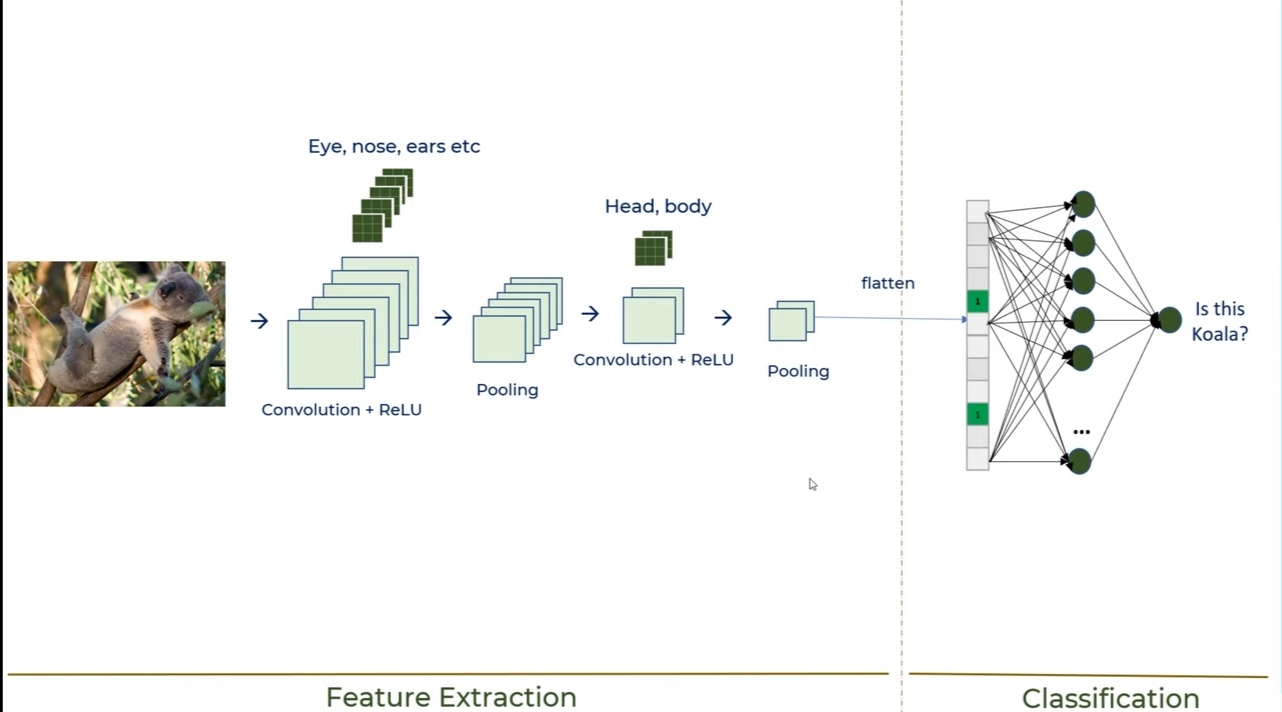

In [12]:
from IPython.display import Image
Image(filename='D:\Akash\Machine Learning\Data_for_ML\\CNN-for-image.jpeg')

In [18]:
cnn = models.Sequential([
    # Feature Extraction
    layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Classification
    layers.Flatten(),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(64 , activation = 'softmax')
])

cnn.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

cnn.fit(x_train , y_train , epochs=5)

Epoch 1/5
1563/1563 [==============================] - 491s 311ms/step - loss: 1.5265 - accuracy: 0.4543
Epoch 2/5
1563/1563 [==============================] - 448s 287ms/step - loss: 1.1524 - accuracy: 0.5964
Epoch 3/5
1563/1563 [==============================] - 234s 150ms/step - loss: 1.0154 - accuracy: 0.6476
Epoch 4/5
1563/1563 [==============================] - 369s 236ms/step - loss: 0.9244 - accuracy: 0.6769
Epoch 5/5
1563/1563 [==============================] - 386s 247ms/step - loss: 0.8538 - accuracy: 0.7036


In [21]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.9288 - accuracy: 0.6793


[0.9288448095321655, 0.6793000102043152]

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report \n", classification_report(y_test , y_pred_classes))

Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.80      0.81      0.80      1000
           2       0.52      0.64      0.57      1000
           3       0.48      0.56      0.51      1000
           4       0.72      0.45      0.55      1000
           5       0.61      0.58      0.60      1000
           6       0.78      0.76      0.77      1000
           7       0.68      0.77      0.72      1000
           8       0.77      0.79      0.78      1000
           9       0.80      0.75      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



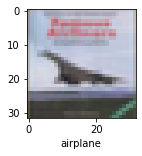

In [22]:
plot_sample(x_test, y_test,3)

In [23]:
classes[y_pred_classes[3]]

'airplane'